In [464]:
# Consider the Fourier Transform Pair:
using Waveforms, Plots
function heaviside(t)
   0.5 * (sign(t) + 1)
end;

In [463]:
heaviside(1);

In [318]:
t = LinRange(-0.5,0.5,10001)
plot(t, [heaviside(t) for t in t]);

In [465]:
function interval(t, a, b)
   heaviside(t-a) - heaviside(t-b)
end

function piecewise(t)
   sinc(t) .* interval(t,-3,3) + cos(t) .* interval(t, 4,7)
end;

In [320]:
test = [interval(t_,-1,1) for t_ in t];

In [321]:
plot(t, test);

In [489]:
tmaxRange = LinRange(-1,1,10001)
Π_t(A,t) = [interval(t,(-0.5/A), (0.5/A)) for t in tmaxRange];

In [490]:
Π_2t = Π_t(2,t);

In [491]:
p1_mag_xt = plot(t, Π_2t, xlims = (-0.5, 0.5), xticks =-0.5:0.1:0.5,
    title = "Plot of |x(t)|", xlabel = "t [s]", ylabel = "x(t)");

In [492]:
using FFTW
A = 2
t = LinRange(-0.5,0.5,10001)
fx_t = [interval(t,(-0.5/A), (0.5/A)) for t in t]
plot(t,fx_t);

In [493]:
#f_range = LinRange(-5,5,length(t))
#FFT_X = fft(fx_t)
#mag_FFT_X = .√(real(FFT_X).^2+imag(FFT_X).^2)
#plot(f_range, mag_FFT_X./A)

In [494]:
#phase = angle.(F_Π_2t)
#plot(f_range, phase)

In [495]:
phase = angle.(fx_t)
plot(f_range, phase);

In [496]:
f_range = -5:0.001:5;

In [497]:
Π_f(A,f) = [(abs((1/(A))*sinc(f/A))) for f in f_range]
Π_fsign(A,f) = [(((1/(A))*sinc(f/A))) for f in f_range];

In [498]:
Π_F = Π_f(2,f_range)
Π_Fs = Π_fsign(2,f_range);

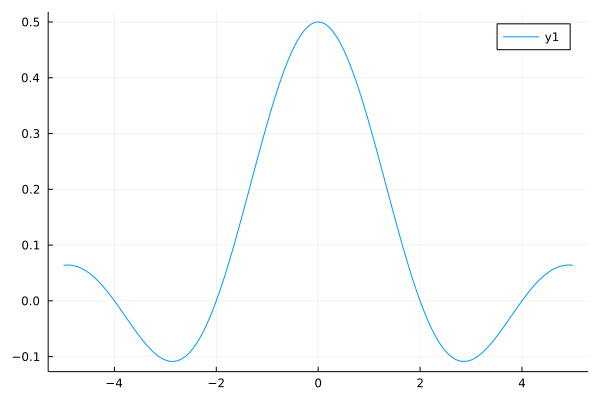

In [529]:
plot(f_range, Π_Fs)

In [500]:
p1_phase = plot(f_range, rad2deg.(angle.(Π_Fs)), 
    widen=true, xlims = (-5, 5), xticks =-5:1:5, ylims = (0,200),
    title = "Phase Plot of X(f)", ylabel = "Phase(f) [°]", xlabel = "f [Hz]", legend = false, titlefontsize = 8);

In [501]:
p1_mag_xFplot = plot(f_range, Π_F, xlims = (-5,5),
    title = "Magnitude Plot of |X(f)|", xlabel = "f [Hz]", ylabel = "|X(f)|", legend = false, titlefontsize = 8);

In [502]:
plot(p1_mag_xFplot,p1_phase, layout=(2, 1));

In [503]:
t = LinRange(-0.5,0.5, 10001)
#y_t = test2*cos(2*π*t) for t in t]
cos_vect = cos.((2*π*10*t))
plot(t, cos_vect, widen = true);

In [504]:
y_t = fx_t .* cos_vect;

In [505]:
p1_yt = plot(t, y_t, 
    widen = true, xlims = (-0.5,0.5), title = "y(t)", ylabel = "y(t)", xlabel = "t [s]", titlefontsize = 8);

In [506]:
plot(p1_mag_xFplot,p1_phase, p1_yt, layout=(3, 1));

In [507]:
fₒ = 5;
f_range_2 = LinRange(0,10, 10001)
Y_F = 5 .* Π_f(2,(f_range_2 .- fₒ));

In [508]:
p1_YF_plot = plot(f_range_2, Y_F,
     widen=true, xlims = (0, 10), xticks =0:1:10, ylims = (0,2.5),
    title = "Magnitude of Y(f)", ylabel = "|Y(f)|", xlabel = "f [Hz]", legend = false, titlefontsize = 8);

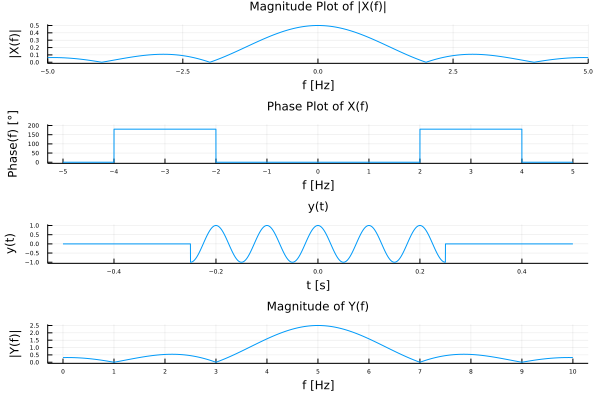

In [509]:
plot(p1_mag_xFplot,p1_phase, p1_yt, p1_YF_plot, layout=(4, 1),
    labelfontsize = 8,
    titlefontsize = 8, 
    axisfontsize = 8, tickfontsize = 4, legend = false)

In [515]:
t_range_shift = t.+0.2
z_t = Π_t(2,(t .- 0.2));

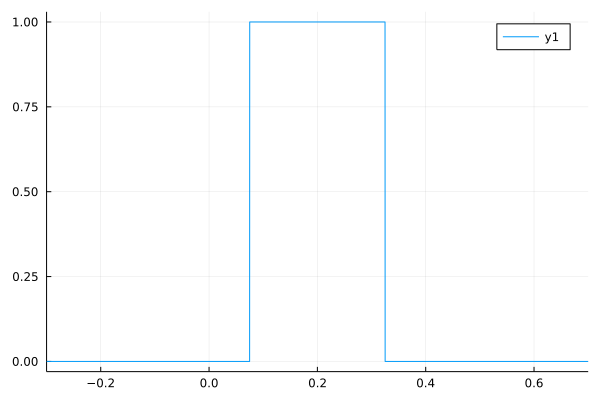

In [518]:
plot(t_range_shift, z_t, xlims = (-0.3, 0.7))

In [533]:
tₒ = 0.2
Z_F = ℯ^(-im*2*π*fₒ*tₒ)*Π_Fs;

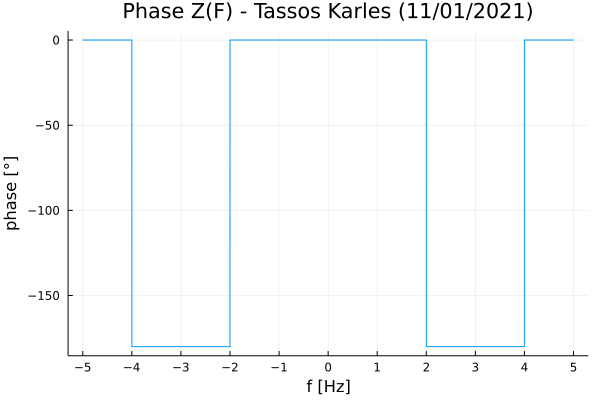

In [543]:
phase_XF = rad2deg.(angle.(Z_F))
p1_phase_XF = plot(f_range, phase_XF, title = "Phase Z(F) - Tassos Karles (11/01/2021)",
    ylabel = "phase [°]", xlabel = "f [Hz]", legend = false, widen = true, xlims = (-5,5),
    xticks = -5:1:5)

In [553]:
plot(p1_mag_xFplot,p1_phase, p1_yt, p1_YF_plot, p1_phase_XF,
    layout=(4,1,1),
    labelfontsize = 8,
    titlefontsize = 8, 
    axisfontsize = 8, tickfontsize = 4, legend = false)


LoadError: MethodError: no method matching layout_args(::Int64, ::Tuple{Int64, Int64, Int64})
[0mClosest candidates are:
[0m  layout_args(::Integer) at /Users/ack/.julia/packages/Plots/T6yvp/src/layouts.jl:463
[0m  layout_args(::Integer, [91m::Integer[39m) at /Users/ack/.julia/packages/Plots/T6yvp/src/layouts.jl:473
[0m  layout_args(::Integer, [91m::Plots.GridLayout[39m) at /Users/ack/.julia/packages/Plots/T6yvp/src/layouts.jl:501
[0m  ...

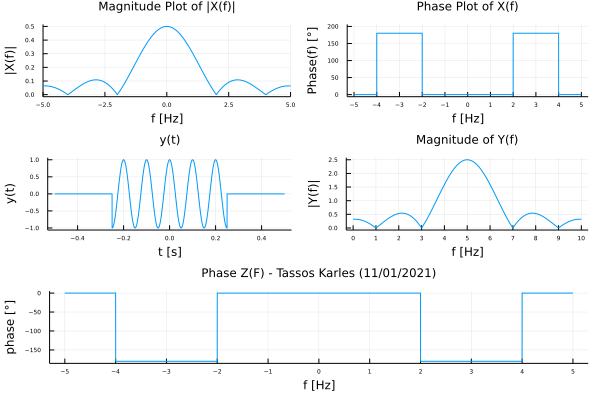

In [605]:
## Part 1 Final Graph
l = @layout([° ° ; ° °;°])

plot(p1_mag_xFplot,p1_phase, p1_yt, p1_YF_plot, p1_phase_XF,
    layout=l,
    labelfontsize = 8,
    titlefontsize = 8, 
    axisfontsize = 8, tickfontsize = 4, legend = false)

In [1155]:
## Part 2
conv_range=0:10000
t_range = LinRange(0,10,1000)
h(t) = t
h_t = [h(t) for t in t_range];

In [1156]:
x_p2(t) = 0.8^t;

In [1157]:
xp2_t = [x_p2(t) for t t_range];

LoadError: syntax: invalid iteration specification

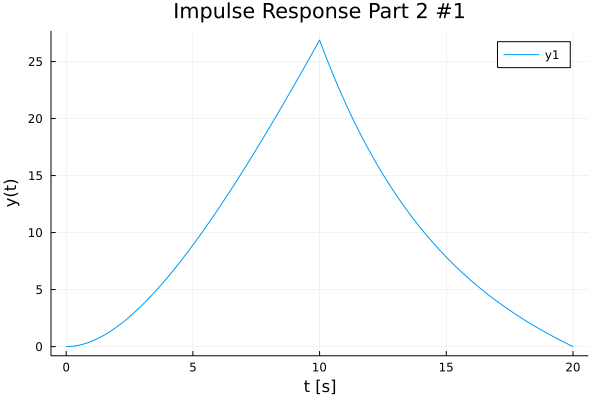

In [1158]:
#y(t) = h(t) conv. x(t)
using DSP
h_t2 = [h((t*maximum(t_range))/length(conv_range)) for t in conv_range];
xp2_t2 = [x_p2((t*maximum(t_range))/length(conv_range)) for t in conv_range];
y_t_p2 = conv(h_t2,xp2_t2)*(maximum(t_range))/length(conv_range)
t_range3 = LinRange(0,2*maximum(t_range),length(y_t_p2))
p2_plot1 = plot(t_range3, y_t_p2, 
    widen = true,
    ylabel = "y(t)", xlabel = "t [s]", title = "Impulse Response Part 2 #1")

In [ ]:
h_t2 = [h((t*maximum(t_range))/length(conv_range)) for t in conv_range];
xp2_t2 = [x_p2((t*maximum(t_range))/length(conv_range)) for t in conv_range];
y_t_p2 = conv(h_t2,xp2_t2)*(maximum(t_range))/length(conv_range)
t_range3 = LinRange(0,2*maximum(t_range),length(y_t_p2))
p2_plot1 = plot(t_range3, y_t_p2, 
    widen = true,
    ylabel = "y(t)", xlabel = "t [s]", title = "Impulse Response Part 2 #1")

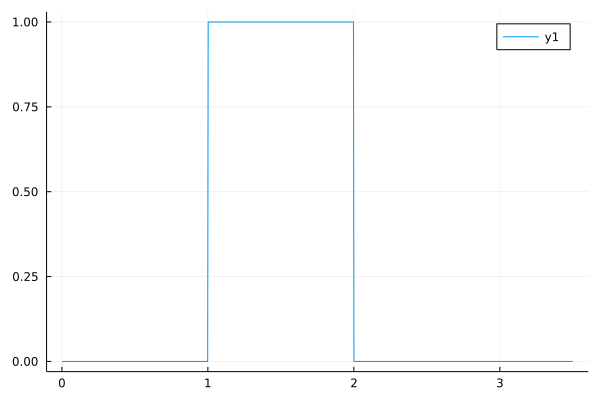

In [1474]:
#plot(t_range4, [interval(t, 1, 2) for  t in t_range4])

In [1475]:
conv_range=0:1000
t_range4  = LinRange(0,3.5,1000)
tmax = maximum(t_range4)
h2(t_) = (ℯ^(-2*t_))*heaviside(t_-1)
h_2t = [h2(t_) for t_ in t_range4]

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0009849468053976537
 0.000978069399385729
 0.0009712400149656236
 0.0009644583168258455
 0.0009577239719962159
 0.0009510366498315318
 0.0009443960219953193
 0.0009378017624437221
 0.0009312535474094905
 0.0009247510553860807
 0.0009182939671118793
 0.0009118819655545162

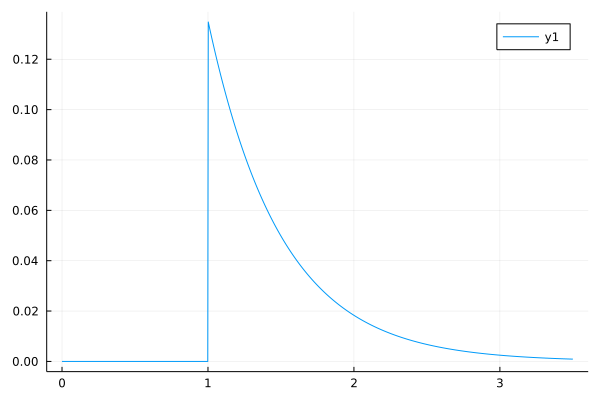

In [1476]:
#t_range4 = LinRange(0,3,length(h_2t))
plot(t_range4, h_2t)

In [1477]:
x2(t_) = (heaviside(t_) - heaviside(t_-2));
length(conv_range)

1001

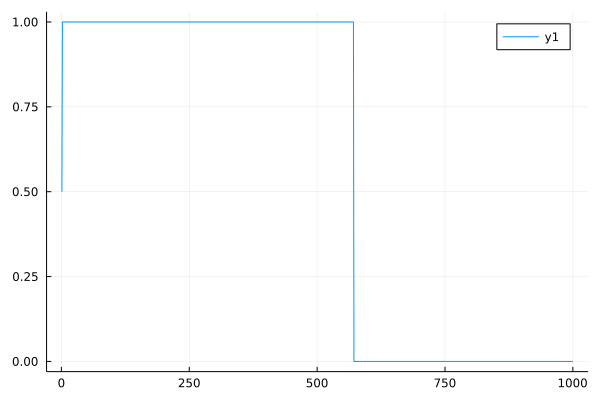

In [1478]:
x2t = [x2(t_) for t_ in t_range4];
plot(x2t)

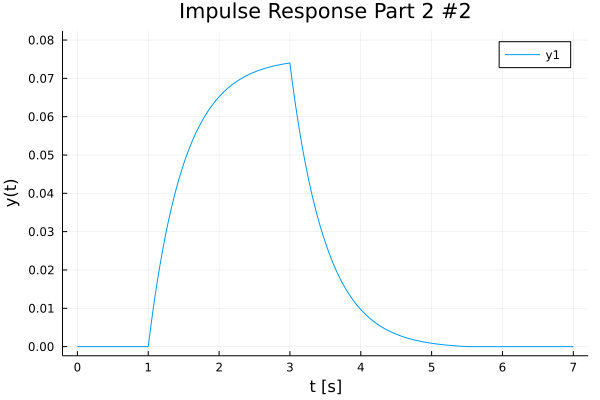

In [1479]:
y_t2 = conv(h_2t./sizeof(conv_range),x2t./sizeof(conv_range))
#y_t_test = reshape(y_t2, length(t_range4))
t_range3 = LinRange(0,2*maximum(t_range4),length(y_t2))
p2_plot2 = plot(t_range3, y_t2,
    widen = true, 
    ylabel = "y(t)", 
   yticks = 0:0.01:0.08,
   ylims = (0,0.08),
    xlabel = "t [s]", title = "Impulse Response Part 2 #2",
    xticks = 0:1:7
    )

In [1480]:
maximum(y_t2)

0.07402386983751416

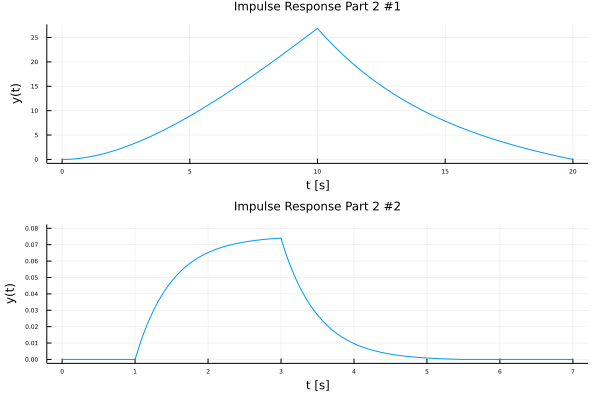

In [1482]:
plot(p2_plot1, p2_plot2,
    layout=(2,1),
    labelfontsize = 8,
    titlefontsize = 8, 
    axisfontsize = 8, tickfontsize = 4, legend = false, widen = true)

In [1709]:
## Part 3
t_range5 = LinRange(0,10,1000)
m(t_) = 1.0+0.7*sin(2*π*55*t_) + 1.2*cos(2*π*110*t_)
f1 = 55;
f2 = 110;

Nt = 1000;
fo = gcd(f1,f2)
NT = 3
T = 1/fo

tmax = NT/fo;

t = LinRange(0,tmax,Nt);

m_t = [m(t_) for t_ in t]
dt = tmax/(Nt-1)
fs = 1/dt

18315.0

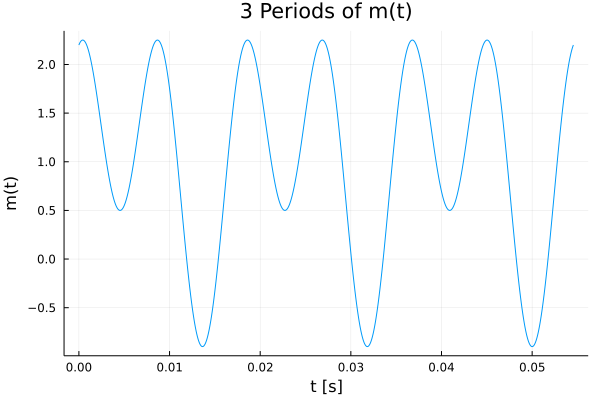

In [1711]:
p3_1 = plot(t, m_t, 
    widen = true,
    xlabel = "t [s]", ylabel = "m(t)", title = "3 Periods of m(t)", legend = false)

In [1727]:
f_fft_range = AbstractFFTs.fftfreq.(length(m_t), fs) |> fftshift

-9157.5:18.315:9139.185

In [1713]:

phase = angle.(fft(m_t))

plot(f_fft_range, phase, ylabel = "m(t)", title = "Phase of m(t)", legend = false);

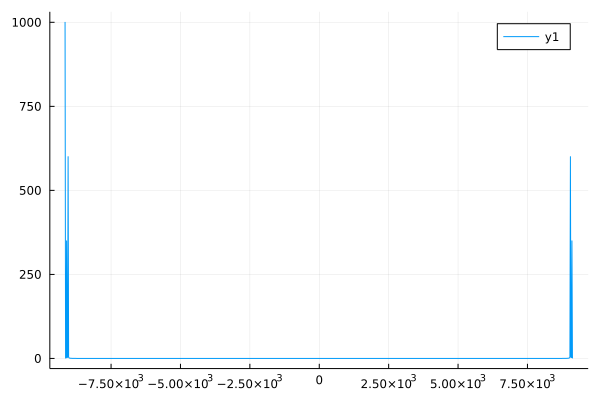

In [1730]:
mag = abs.(fft(m_t))
plot(f_fft_range, mag)

In [1767]:
mag_shift = real(abs.(fft(m_t))) |> fftshift
f_fft_range2 = AbstractFFTs.fftfreq.(length(mag_shift), fs) |> fftshift;
rf_fft_range2 = AbstractFFTs.fftfreq.(length(mag_shift), fs) |> fftshift;

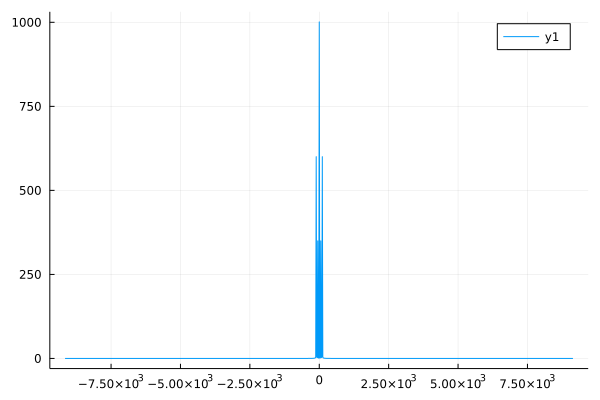

In [1768]:
plot(f_fft_range2, mag_shift)

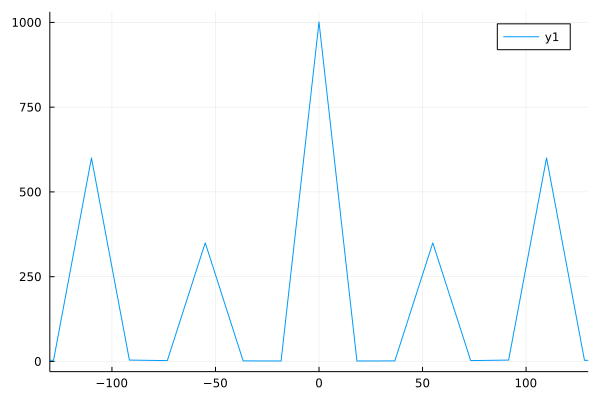

In [1769]:
plot(f_fft_range2, mag_shift, xlims = (-130,130))

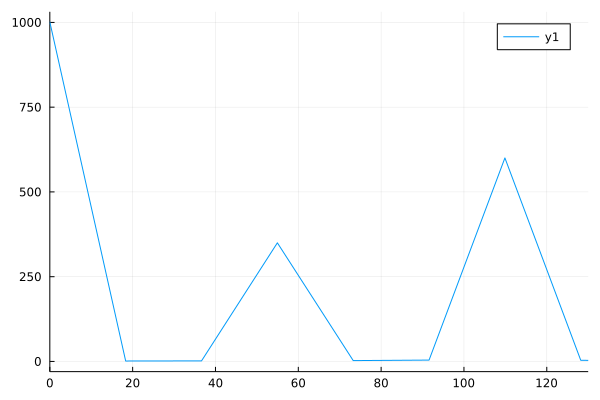

In [1776]:
plot(f_fft_range2, mag_shift, xlims = (0,130))